# Introduction to Pandas

## 1. Reading data

In [319]:
#From a csv file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

%matplotlib inline

df = pd.read_csv('../data-titanic/train.csv')
print(df.shape)
df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Preprocessing

### 2.1 Data munging

#### 2.1.1 Examining de DF

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [321]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [322]:
df.duplicated().any()

False

In [323]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [324]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### 2.1.2 Feature engineering

##### Age

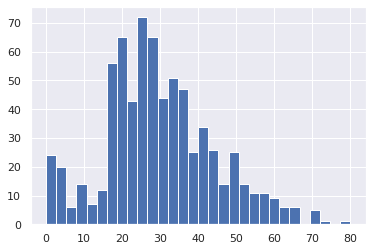

In [325]:
#Histogram of "Ages"
df['Age'].hist(bins=30, range=(0, df['Age'].max()))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0763633c50>,
      dtype=object)

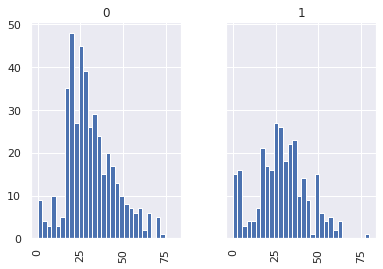

In [326]:
#Histogram of "Ages" grouped by "Survived"
df.hist(column='Age', by='Survived', sharey=True, bins=30,  range=(0, df['Age'].max()))

Text(0.5, 1.0, 'Passenger class per sex < 25 YO')

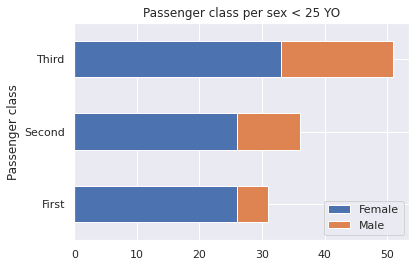

In [327]:
#Plot of "Survived" people younger than 25 YO grouped by "Sex" and "Pclass"
pclass_labels = ['First', 'Second', 'Third']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Age < 25 and Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex']).plot(kind='barh',
                                                            stacked=True, rot=0, subplots=False)
plt.set_yticklabels(pclass_labels)
plt.legend(labels=sex_labels)

plt.set_ylabel('Passenger class')
plt.set_title('Passenger class per sex < 25 YO')

Text(0.5, 1.0, 'Passenger class per sex between 25 and 50 YO')

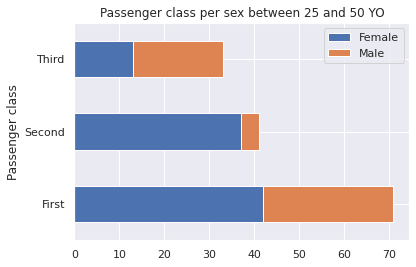

In [328]:
#Plot of "Survived" people between 25 and 50 YO grouped by "Sex" and "Pclass"
pclass_labels = ['First', 'Second', 'Third']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Age >= 25 and Age < 50 and Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex'])\
    .plot(kind='barh', stacked=True, rot=0, subplots=False)
plt.set_yticklabels(pclass_labels)
plt.legend(labels=sex_labels)

plt.set_ylabel('Passenger class')
plt.set_title('Passenger class per sex between 25 and 50 YO')

Text(0.5, 1.0, 'Passenger class per sex over 50 YO')

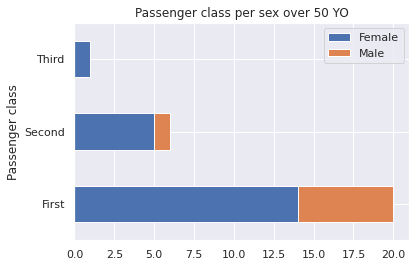

In [329]:
#Plot of "Survived" people over 50 YO grouped by "Sex" and "Pclass"
pclass_labels = ['First', 'Second', 'Third']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Age >= 50 and Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex'])\
    .plot(kind='barh', stacked=True, rot=0, subplots=False)
plt.set_yticklabels(pclass_labels)
plt.legend(labels=sex_labels)

plt.set_ylabel('Passenger class')
plt.set_title('Passenger class per sex over 50 YO')

##### Sex

In [331]:
d = {"Sex": df['Sex'].unique(),
     "Passengers": df.groupby('Sex').size().reset_index(drop=True),
     "Survived": df.groupby('Sex')['Survived'].sum().reset_index(drop=True),
     "Survived %": df.groupby('Sex')['Survived'].mean().reset_index(drop=True)}
sex_df = pd.DataFrame(d)
sex_df

,Sex,Passengers,Survived,Survived %
0,male,314,233,0.742038
1,female,577,109,0.188908


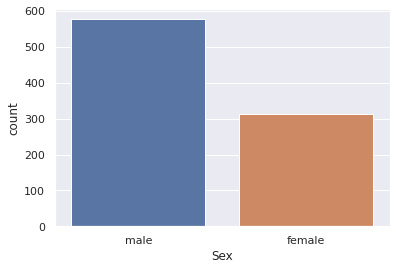

In [332]:
sns.countplot(x='Sex', data=df)

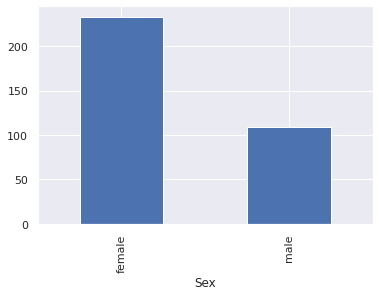

In [333]:
df.groupby('Sex')['Survived'].sum().plot(kind='bar')

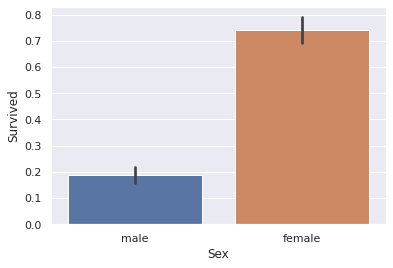

In [334]:
sns.barplot(x='Sex', y='Survived', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0761e50780>,
      dtype=object)

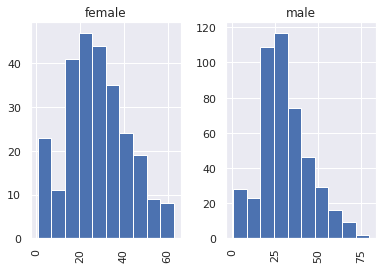

In [335]:
df.hist(column='Age', by='Sex')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0761ae42b0>,
      dtype=object)

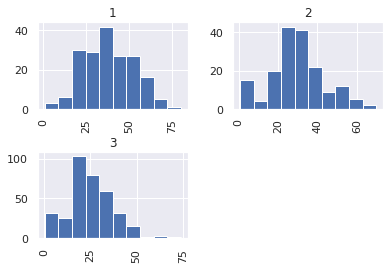

In [336]:
df.hist(column='Age', by='Pclass')

##### Pclass

In [337]:
d={"Pclass": df['Pclass'].unique(),
   "Passengers p/class": df.groupby('Pclass').size().reset_index(drop=True),
   "Survived": df.groupby('Pclass')['Survived'].sum().reset_index(drop=True),
   "% Survived": df.groupby('Pclass')['Survived'].mean().reset_index(drop=True)}

pclass_df = pd.DataFrame(d)
pclass_df = pclass_df.sort_values(by='Pclass', ascending=True)
pclass_df

,Pclass,Passengers p/class,Survived,% Survived
1,1,184,87,0.472826
2,2,491,119,0.242363
0,3,216,136,0.629630


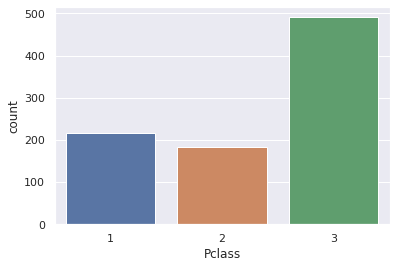

In [338]:
sns.countplot(x='Pclass', data=df)

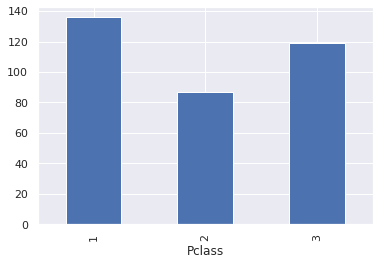

In [339]:
df.groupby('Pclass')['Survived'].sum().plot(kind='bar')

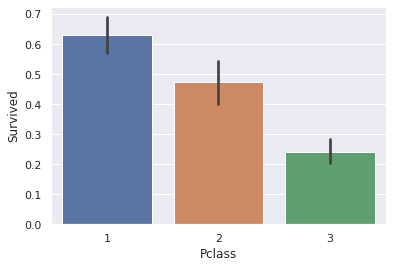

In [340]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [383]:
df.groupby(['Pclass', 'Sex'])['Survived'].sum()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

In [342]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Passenger class per sex')

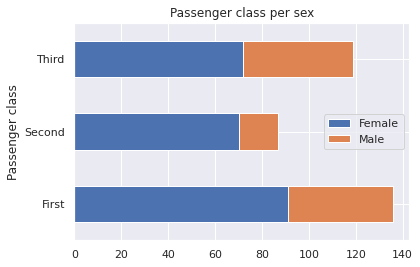

In [386]:
pclass_labels = ['First', 'Second', 'Third']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex']).plot(kind='barh',
                                                            stacked=True, rot=0, subplots=False)
plt.set_yticklabels(pclass_labels)
plt.legend(labels=sex_labels)

plt.set_ylabel('Passenger class')
plt.set_title('Passenger class per sex')

##### Fare

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0761e50518>,
      dtype=object)

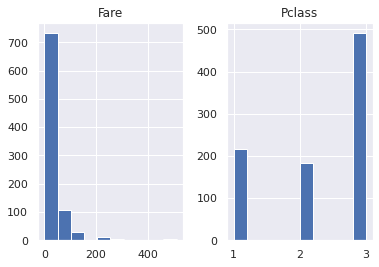

In [343]:
#Since there is a strong correlation between Pclass and Fare, let us show the distribution of both features
df.hist(['Pclass', 'Fare'])

Fare    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

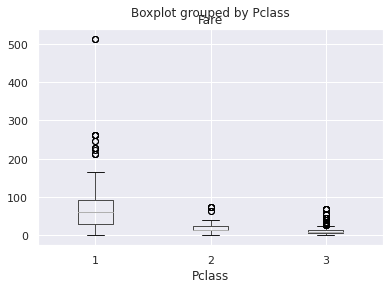

In [344]:
#Since the fare feature is righ sweked, let us detect outliers per Pclass
df.boxplot(column='Fare', by='Pclass', return_type='axes')

In [345]:
#Most of the outliers are in the 1st class
df[df.Fare > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [346]:
#Replacing de outliers with the second highest value
df.loc[df.Fare > 300, 'Fare'] = df['Fare'].sort_values(ascending=False).unique()[1]
df.sort_values('Fare', ascending=False).head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,263.000,NaN,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,263.000,B101,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,263.000,B51 B53 B55,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


Fare    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

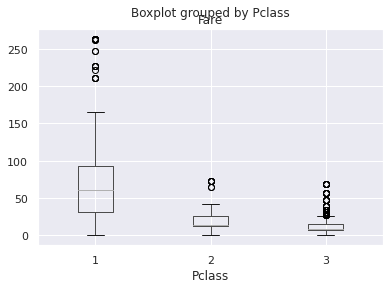

In [347]:
df.boxplot(column='Fare', by='Pclass', return_type='axes')

##### Embarked

In [348]:
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

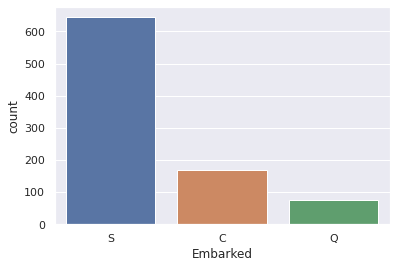

In [349]:
sns.countplot(x='Embarked', data=df)

In [350]:
df.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

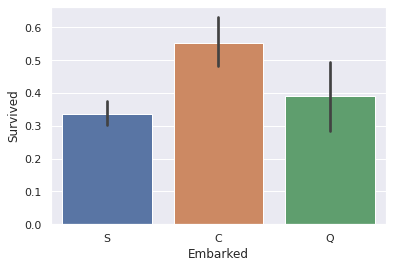

In [351]:
sns.barplot(x='Embarked', y='Survived', data=df)

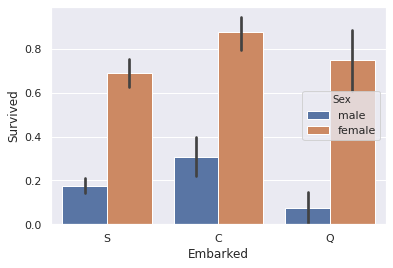

In [352]:
sns.barplot(x='Embarked', y='Survived', hue= 'Sex', data=df)

##### SibSp

In [353]:
df.groupby('SibSp').size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

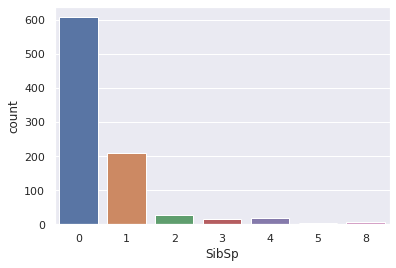

In [354]:
sns.countplot(x='SibSp', data=df)

In [355]:
df.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0761531978>,
      dtype=object)

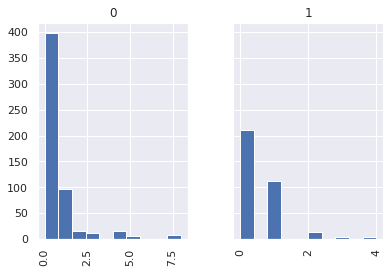

In [356]:
df.hist(column='SibSp', by='Survived', sharey=True)

In [357]:
df.groupby(['SibSp', 'Sex']).size()

SibSp  Sex   
0      female    174
       male      434
1      female    106
       male      103
2      female     13
       male       15
3      female     11
       male        5
4      female      6
       male       12
5      female      1
       male        4
8      female      3
       male        4
dtype: int64

In [358]:
df.groupby(['SibSp', 'Sex']).Survived.mean()

SibSp  Sex   
0      female    0.787356
       male      0.168203
1      female    0.754717
       male      0.310680
2      female    0.769231
       male      0.200000
3      female    0.363636
       male      0.000000
4      female    0.333333
       male      0.083333
5      female    0.000000
       male      0.000000
8      female    0.000000
       male      0.000000
Name: Survived, dtype: float64

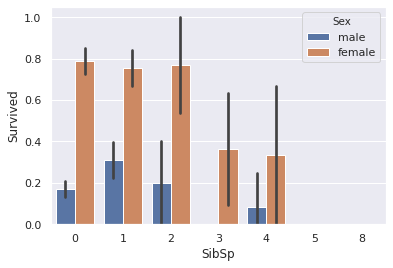

In [359]:
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=df)

In [360]:
df.groupby(['SibSp', 'Sex']).Age.mean()

SibSp  Sex   
0      female    28.631944
       male      32.615443
1      female    30.738889
       male      29.461505
2      female    16.541667
       male      28.230769
3      female    16.500000
       male       8.750000
4      female     8.333333
       male       6.416667
5      female    16.000000
       male       8.750000
8      female          NaN
       male            NaN
Name: Age, dtype: float64

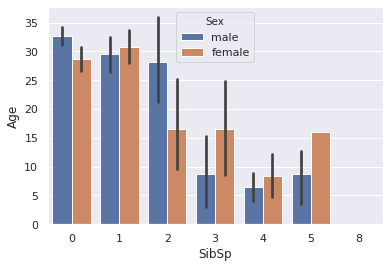

In [361]:
sns.barplot(x='SibSp', y='Age', hue='Sex', data=df)

In [362]:
df.groupby(['SibSp', 'Pclass']).Survived.mean()

SibSp  Pclass
0      1         0.562044
       2         0.416667
       3         0.236467
1      1         0.746479
       2         0.581818
       3         0.325301
2      1         0.800000
       2         0.500000
       3         0.333333
3      1         0.666667
       2         1.000000
       3         0.083333
4      3         0.166667
5      3         0.000000
8      3         0.000000
Name: Survived, dtype: float64

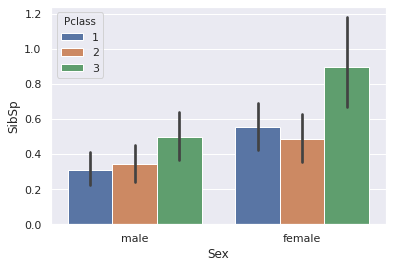

In [363]:
sns.barplot(x='Sex', y='SibSp', hue='Pclass', data=df)

##### ParCh

In [364]:
df.groupby('Parch').size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

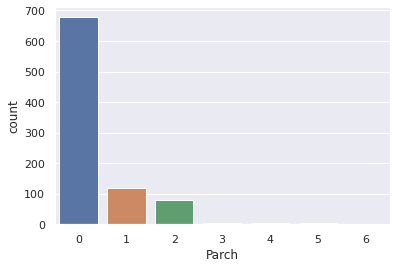

In [365]:
sns.countplot(x='Parch', data=df)

In [366]:
df.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

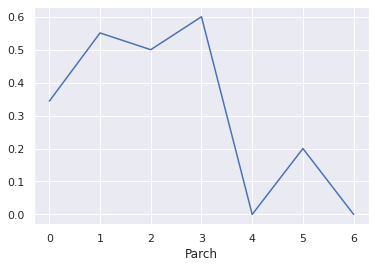

In [367]:
df.groupby('Parch').Survived.mean().plot()

In [368]:
df.groupby(['Pclass', 'Sex', 'Parch'])['Parch', 'SibSp', 'Survived']\
    .agg({'Parch': np.size, 'SibSp': np.mean, 'Survived': np.mean})

/home/lereyes/Documentos/personal/sitc-master-20200325T154247Z-001/sitc-master/ml1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Parch     SibSp  Survived
Pclass Sex    Parch                           
1      female 0         64  0.484375  0.984375
              1         17  0.411765  1.000000
              2         13  1.076923  0.846154
       male   0         99  0.262626  0.363636
              1         14  0.357143  0.285714
              2          8  0.750000  0.625000
              4          1  1.000000  0.000000
2      female 0         45  0.333333  0.888889
              1         18  0.722222  0.944444
              2         11  0.545455  1.000000
              3          2  1.500000  1.000000
       male   0         89  0.224719  0.089888
              1         14  1.071429  0.500000
              2          5  0.400000  0.400000
3      female 0         85  0.341176  0.588235
              1         25  1.240000  0.480000
              2         25  2.560000  0.320000
              3          2  0.500000  0.500000
              4          2  0.500000  0.000000
              5          4  0.500000  0.250000
              6          1  1.000000  0.000000
       male   0        296  0.135135  0.121622
              1         30  1.900000  0.266667
              2         18  4.055556  0.166667
              3          1  1.000000  0.000000
              4          1  1.000000  0.000000
              5          1  1.000000  0.000000

In [369]:
df.query('(Sex == "male") and (Pclass == [1, 2]) and (Parch == [1, 2])')[['Survived', 'Age']].mean()

Survived     0.439024
Age         27.871951
dtype: float64

In [370]:
df.query('(Sex == "male") and (Pclass == [1, 2])')[['Survived', 'Age']].mean()

Survived     0.269565
Age         36.063750
dtype: float64

In [371]:
df_modified = df.copy()

In [372]:
df_modified.fillna(df_modified.groupby('Embarked').size().sort_values(ascending=False).index[0], inplace=True)

In [373]:
df_modified = pd.get_dummies(df, columns=['Embarked', 'Pclass'])

In [374]:
#Since the original DF is rightly skewed, we are going to fill all NaN values with the median
df_modified['Age'] = df_modified['Age'].fillna(df['Age'].median())

In [375]:
#Dropping not important columns
df_modified.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [376]:
#Enconding "Sex" feature
for sex in df_modified['Sex'].unique():
    if sex == "male":
        df_modified.loc[df_modified["Sex"] == "male", "Sex"] = 0
    else:
        df_modified.loc[df_modified["Sex"] == "female", "Sex"] = 1

In [377]:
df_modified.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,5,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [378]:
df_modified.isnull().sum()



PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64